# **Twitter** **Sentiment** **Analysis**
- **Rupesh** **kumar**

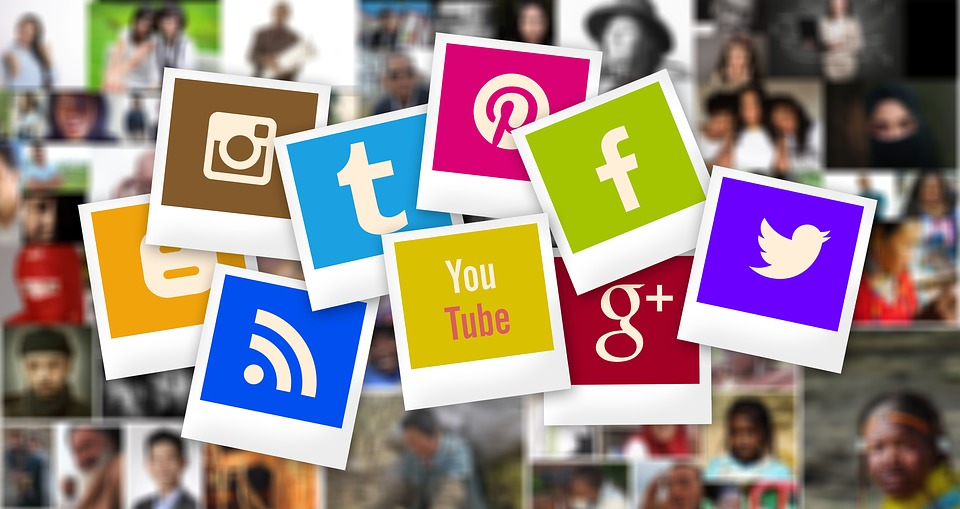


# **Problem Statyement : -**

   Dataset containing several tweets with positive and negative sentiments associated with it
   - Cyber bullying and hate speech has been a menace for quite a long time,So our objective for this task is to detect tweets associated with negative sentiments.From this dataset we classify a tweet as hate speech if it has racist or sexist tweets associated with it.
   

# Dataset Description :
  - Data is in .csv (Comma Seprated Values) format.
  - In computing, .csv is simple plain text file which stores number and text in tabular form.Each line of the file is a data record. Each record consists of one or more fields, separated by commas.
  - Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist,our objective is to predict the labels on the given test dataset.


# Attribute Details - 

tweets - Collected from several source
label - '0' for positive sentiment and '1' for negative sentiment

# Importing Necessary Packages

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')
s = "This is very good mov"
print(word_tokenize(s))

# using split 
lens = [w for w in s.split()]
print(lens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['This', 'is', 'very', 'good', 'mov']
['This', 'is', 'very', 'good', 'mov']


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

words = stopwords.words('english')
print(words)
stop = np.array(words)
print(stop.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
len = [w for w in lens if w not in stop]
print(len)


['This', 'good', 'mov']


In [ ]:
### stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stemmed = [ps.stem(w) for w in len]

print(stemmed)


['thi', 'good', 'mov']


# Train dataset used for analysis

In [ ]:
#  data loading

train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


# Test dataset used for analysis

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


Cleaning of dataset 
  - remove @symbols
  - unwanted space etc.. 

In [ ]:
# cleaning words
# using regular expression
import re
  

In [ ]:
def remove_pattern(pattern, text):
  occur = re.findall(pattern, text)
  for i in occur:
    text = re.sub(i, "", text)

  return text

In [ ]:
pat = "@[\w]*"
train['new_tweet'] = [remove_pattern(pat, sen) for sen in train['tweet']]


print(train.info())

print(train['new_tweet'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31962 non-null  int64 
 1   label      31962 non-null  int64 
 2   tweet      31962 non-null  object
 3   new_tweet  31962 non-null  object
dtypes: int64(2), object(2)
memory usage: 998.9+ KB
None
0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can't use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate  isz that youuu?ððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     #sikh #temple vandalised in in #calgary, #wso...
31961      

In [ ]:
#  remove !

train['new_tweet'] = train['new_tweet'].str.replace("^a-zA-Z#", " ")

print(train['new_tweet'])

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can't use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate  isz that youuu?ððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     #sikh #temple vandalised in in #calgary, #wso...
31961                          thank you  for you follow  
Name: new_tweet, Length: 31962, dtype: object


Tokenization

In [ ]:
# tokenization using split

train['new_tweet'] = train['new_tweet'].apply(lambda x : x.split())

print(train['new_tweet'])

0        [when, a, father, is, dysfunctional, and, is, ...
1        [thanks, for, #lyft, credit, i, can't, use, ca...
2                                  [bihday, your, majesty]
3        [#model, i, love, u, take, with, u, all, the, ...
4                 [factsguide:, society, now, #motivation]
                               ...                        
31957    [ate, isz, that, youuu?ðððððð...
31958    [to, see, nina, turner, on, the, airwaves, try...
31959    [listening, to, sad, songs, on, a, monday, mor...
31960    [#sikh, #temple, vandalised, in, in, #calgary,...
31961                       [thank, you, for, you, follow]
Name: new_tweet, Length: 31962, dtype: object


Stopword removal

In [ ]:
# stopword removal
train['new_tweet'] = train['new_tweet'].apply(lambda x : [w for w in x if w not in stop])

print(train['new_tweet'])

0        [father, dysfunctional, selfish, drags, kids, ...
1        [thanks, #lyft, credit, can't, use, cause, off...
2                                        [bihday, majesty]
3        [#model, love, u, take, u, time, urð±!!!, ð...
4                      [factsguide:, society, #motivation]
                               ...                        
31957    [ate, isz, youuu?ðððððððð...
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [#sikh, #temple, vandalised, #calgary,, #wso, ...
31961                                      [thank, follow]
Name: new_tweet, Length: 31962, dtype: object


Lametization 

In [ ]:
# lametization
train['new_tweet'] = train['new_tweet'].apply(lambda x : [ps.stem(w) for w in x])

train['new_tweet'] = train['new_tweet'].apply(lambda x : ' '.join(x))

print(train['new_tweet'])

0        father dysfunct selfish drag kid dysfunction. ...
1        thank #lyft credit can't use caus offer wheelc...
2                                           bihday majesti
3        #model love u take u time urð±!!! ððð...
4                               factsguide: societi #motiv
                               ...                        
31957    ate isz youuu?ðððððððð...
31958    see nina turner airwav tri wrap mantl genuin h...
31959             listen sad song monday morn otw work sad
31960     #sikh #templ vandalis #calgary, #wso condemn act
31961                                         thank follow
Name: new_tweet, Length: 31962, dtype: object


# Applying count vectorizer


In [ ]:
# apply count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(max_df = 0.8, min_df = 2, max_features= 1000, stop_words= 'english')
f_data = vec.fit_transform(train['new_tweet'])


pdf_data = pd.DataFrame(f_data.todense())

pdf_data

#  apply tfidf vectorizer





,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Train test split

In [ ]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pdf_data, train['label'], test_size = 0.3)


# Applying machine learning algorithm
  1. Logistic Regression

In [ ]:
# model
# LogisticRegression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver = 'lbfgs')

LR.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Prediction

In [ ]:
# prediction

prediction = LR.predict(x_test)

prediction


array([0, 0, 0, ..., 0, 0, 0])

Accuracy

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score

acc = accuracy_score(prediction, y_test)

print(acc)


0.9468140577745333


f1 Score

In [ ]:
# f1 score

from sklearn.metrics import f1_score

acc = f1_score(prediction, y_test)

print(acc)

0.48588709677419356


2. SVM (Support Vector Machine)

In [ ]:
# using svm

from sklearn.svm import SVC

sv = SVC()

sv.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

prediction

In [ ]:
# prediction using svm
prediction = sv.predict(x_test)

prediction

array([0, 0, 0, ..., 0, 0, 0])

Accuracy, f1 - Score

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(prediction, y_test)
print(acc)

from sklearn.metrics import f1_score

acc_f1 = f1_score(prediction, y_test)
print(acc_f1)

0.9528626551256648
0.5349794238683128


# Generating tf-Idf vector

In [ ]:
# Generating tf-idf vector
from sklearn.feature_extraction.text import TfidfVectorizer

#  paas parameter otherwise it will crash
vectorizer = TfidfVectorizer(max_df = 0.8, min_df = 2, max_features= 1000, stop_words= 'english');

data_tfidf = vectorizer.fit_transform(train['new_tweet'])

data_tfidf = pd.DataFrame(data_tfidf.todense())

data_tfidf


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.286892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train Test Split

In [ ]:
#  train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_tfidf, train['label'], test_size = 0.3)


Applying Machine learning algorithm on tf - idf vector - 
  1. Logistic Regression

In [ ]:
# LogisticRegression on tfidf
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver = 'lbfgs')

LR.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# prediction

prediction = LR.predict(x_test)

prediction


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score

acc = accuracy_score(prediction, y_test)

print(acc)


0.9505683595786839


In [ ]:
# f1 score

from sklearn.metrics import f1_score

acc = f1_score(prediction, y_test)

print(acc)

0.5021008403361344


# 2 . SVM (Support Vector Machine)

In [ ]:
# using svm on tfidf

from sklearn.svm import SVC

sv = SVC()

sv.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# prediction using svm
prediction = sv.predict(x_test)

prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(prediction, y_test)
print(acc)

from sklearn.metrics import f1_score

acc_f1 = f1_score(prediction, y_test)
print(acc_f1)

0.9530712274481177
0.5417515274949083
